# Análise de dados: Investidores do Tesouro Direto

Neste projeto serão analisados os dados de investidores (pesssoas físicas) do tesouro direto que aderiram ao programa a partir de seu lançamento em janeiro de 2002, com base nos dados (.csv) acessíveis no portal de [Dados Abertos](https://www.tesourotransparente.gov.br/ckan/dataset) disponibilizados pelo [Tesouro Nacional Transparente](https://www.tesourotransparente.gov.br/).

O Tesouro Direto é um programa do Tesouro Nacional desenvolvido em parceria com a B3 (antiga BM&F Bovespa) para venda de títulos públicos federais para pessoas físicas pela internet, com o objetivo de captar recursos e financiar as dívidas públicas, permite fazer aplicações com valores muito baixos e oferece liquidez diária.

## Demanda da análise

- Analisar a evolução de aderências ao programa e elaborar métricas
- Identificar os perfis e elaborar métricas dos investidores

## Indagações a serem respondidas pela análise exploratória dos dados

1. Qual o total de novos investidores por ano (2002 a 2021)?
2. Qual o total de investidores por estado (01/2002 a 07/2022)?
3. Qual o total de investidores em um ranking de 10 cidades (01/2002 a 07/2022)?
4. Qual a quantidade de investidores que operaram nos últimos 12 meses (07/2021 a 07/2022)?
5. Qual a distribuição de investidores por faixa etária e gênero (01/2002 a 07/2022)?
6. Qual a distribuição de investidores por faixa etária, gênero e estado civil (01/2002 e 07/2022)?
7. Qual a distribuição de investidores em um ranking de 10 perfis profissionais por faixa etária e gênero (01/2002 a 07/2022)?

## Importação de pacotes

In [2]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from tabulate import tabulate
from statistics import mode

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


## Carregamento dos dados

In [3]:
# Efetuando limpeza de memória antes do carregamento de dados
gc.collect()

# Caminho do arquivo csv
csv = 'dados/InvestidoresTesouroDireto.csv'

# Carregando em uma lista os nomes das colunas
cols = list(pd.read_csv(csv, encoding='ISO-8859-1', sep=';', nrows=1))

# Criando um dataframe a partir do arquivo csv no diretório dados
# Devido ao tamanho a leitura dos dados será dividida em blocos

chunks = []

for i in pd.read_csv(csv, encoding='ISO-8859-1', sep=';', usecols=[i for i in cols if i != 'Pais do Investidor'], chunksize=5000000):
    chunks.append(i)

df = pd.concat(chunks)

# Informações do dataset como nome das colunas, contagem de linhas, tipo de dados e memória utilizada

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34163675 entries, 0 to 34163674
Data columns (total 10 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Codigo do Investidor  int64 
 1   Data de Adesao        object
 2   Estado Civil          object
 3   Genero                object
 4   Profissao             object
 5   Idade                 int64 
 6   UF do Investidor      object
 7   Cidade do Investidor  object
 8   Situacao da Conta     object
 9   Operou 12 Meses       object
dtypes: int64(2), object(8)
memory usage: 17.2 GB


## Detalhes do dataframe

In [4]:
# Amostra de dados do dataframe

df.sample(5)


,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
25662924,4500732,13/04/2020,Divorciado(a),M,ENGENHEIRO,40,SP,LEME,D,N
13741774,33461986,01/06/2022,Solteiro(a),M,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,18,SP,SAO PAULO,A,N
8915173,31993962,18/04/2022,Solteiro(a),M,EMPRESÁRIO,44,MT,VARZEA GRANDE,A,N
9236808,2153646,21/06/2017,Desquitado(a),M,MÉDICO,36,SP,SAO CAETANO DO SUL,A,N
16170396,30565299,24/02/2022,Desquitado(a),M,"VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CA...",40,SP,ITAPEVA,A,N


In [5]:
# 5 primeiros registros do dataframe

df.head(5)


,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
0,1680523,06/07/2021,Desquitado(a),M,MÉDICO,61,ES,COLATINA,A,N
1,1680525,28/04/2021,Solteiro(a),F,"SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIO...",48,SP,SAO BERNARDO DO CAMPO,A,S
2,1680527,22/03/2017,Não se aplica,M,OUTROS,32,DF,BRASILIA,A,N
3,1680528,28/07/2017,Desquitado(a),M,SERVIDO PÚBLICO ESTADUAL,52,PE,RECIFE,A,N
4,1680529,05/05/2022,Solteiro(a),M,OUTROS,30,AM,MANAUS,A,N


In [6]:
# 5 últimos registros do dataframe

df.tail(5)


,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses
34163670,31198462,21/03/2022,Solteiro(a),F,BIÓLOGO E BIOMÉDICO,25,RS,VIAMAO,A,N
34163671,31199515,21/03/2022,Solteiro(a),F,TRABALHADOR AUTÔNOMO,22,RJ,QUEIMADOS,A,N
34163672,31199859,21/03/2022,Solteiro(a),M,ADMINISTRADOR,30,SC,JOINVILLE,A,N
34163673,31199860,21/03/2022,Solteiro(a),M,ADMINISTRADOR,60,SC,BRUSQUE,A,N
34163674,31200082,21/03/2022,Solteiro(a),F,OUTROS,44,PR,CURITIBA,A,N


In [7]:
# Quantidade de linhas e colunas

df.shape


(34163675, 10)

In [8]:
# Renomeando as colunas

print(df.columns.to_list())

df.rename(columns={
    'Codigo do Investidor': 'codigo',
    'Data de Adesao': 'data_adesao',
    'Estado Civil': 'estado_civil',
    'Genero': 'genero',
    'Profissao': 'profissao',
    'Idade': 'idade',
    'UF do Investidor': 'uf',
    'Cidade do Investidor': 'cidade',
    'Situacao da Conta': 'situacao',
    'Operou 12 Meses': 'operacao'
}, inplace=True)

print('\n', df.columns.to_list())


['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero', 'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor', 'Situacao da Conta', 'Operou 12 Meses']

 ['codigo', 'data_adesao', 'estado_civil', 'genero', 'profissao', 'idade', 'uf', 'cidade', 'situacao', 'operacao']


## Tratando os tipos de valores

In [9]:
# Identificando os tipos de dados das colunas

df.dtypes


codigo           int64
data_adesao     object
estado_civil    object
genero          object
profissao       object
idade            int64
uf              object
cidade          object
situacao        object
operacao        object
dtype: object

In [10]:
# Amostra de dados das colunas que terão seus tipos alterados

df[['codigo', 'data_adesao', 'idade', 'situacao', 'operacao']].sample(5)


,codigo,data_adesao,idade,situacao,operacao
31940802,4514511,30/11/2018,23,A,N
18148166,1191620,18/03/2017,25,A,N
8847217,12957464,17/11/2021,43,A,N
33054433,2773520,25/11/2019,51,A,N
33219575,10457193,18/03/2020,39,A,N


In [11]:
# Efetuando as conversões necessárias dos tipos de dados e exibindo novamente as informações das colunas

df['codigo'] = df['codigo'].astype('int32', errors='ignore')
df['data_adesao'] = pd.to_datetime(df['data_adesao'], format='%d/%m/%Y')
df['idade'] = df['idade'].astype('int8', errors='ignore')
df['situacao'] = df['situacao'].astype('category', errors='ignore')
df['operacao'] = df['operacao'].astype('category', errors='ignore')

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34163675 entries, 0 to 34163674
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   codigo        int32         
 1   data_adesao   datetime64[ns]
 2   estado_civil  object        
 3   genero        object        
 4   profissao     object        
 5   idade         int8          
 6   uf            object        
 7   cidade        object        
 8   situacao      category      
 9   operacao      category      
dtypes: category(2), datetime64[ns](1), int32(1), int8(1), object(5)
memory usage: 11.3 GB


## Tratando valores nulos

In [12]:
# Identificando a quantidade de valores nulos

df.isnull().sum()


codigo           0
data_adesao      0
estado_civil     0
genero           0
profissao        0
idade            0
uf               0
cidade          14
situacao         0
operacao         0
dtype: int64

In [13]:
# Identificando a quantidade campos preenchidos com espaços

# Função para identifcar campos preenchidos com espaços
# param1: dataframe
# param2: coluna

def verifica_espacos(param1, param2):
    x = param1[param2].isin([' ', '  ', '   ', '    ', '     ']).value_counts()
    try:
        print(param2, ': ', x[1])
    except:
        print(param2, ': ', 0)


verifica_espacos(df, 'codigo')
verifica_espacos(df, 'data_adesao')
verifica_espacos(df, 'estado_civil')
verifica_espacos(df, 'genero')
verifica_espacos(df, 'profissao')
verifica_espacos(df, 'idade')
verifica_espacos(df, 'uf')
verifica_espacos(df, 'cidade')
verifica_espacos(df, 'situacao')
verifica_espacos(df, 'operacao')


codigo :  0
data_adesao :  0
estado_civil :  0
genero :  0
profissao :  0
idade :  0
uf :  11
cidade :  0
situacao :  0
operacao :  0


In [14]:
# Usando o valor mais frequente para preencher os campos da coluna [uf]

x = mode(df['uf'])

print('uf : ', x)

df.loc[df['uf'].isin([' ', '  ', '   ', '    ', '     ']), 'uf'] = x

verifica_espacos(df, 'uf')


uf :  SP
uf :  0


In [15]:
# Usando o valor mais frequente para preencher os campos da coluna [cidade] de acordo com a coluna [estado]

y = df.groupby('uf')['cidade'].value_counts()
x = y.loc[x].index[0]

print('cidade : ', x)

df['cidade'].fillna(x, inplace=True)

print('cidade : ', df['cidade'].isnull().sum())


cidade :  SAO PAULO
cidade :  0


In [16]:
# Identificando valores inconsistentes na coluna [idade]
# Registros com valor '0' representam erro no cadastro

print(df.loc[df['idade'] == 0, 'idade'].value_counts(), '\n')

# Usando o valor mais frequente para preencher os campos da coluna [idade]

df.loc[df['idade'] == 0, 'idade'] = mode(df['idade'])

x = df['idade'].unique()
print(np.sort(x))


0    696
Name: idade, dtype: int64 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122]


## Removendo registros que não pertencem a pessoas físicas

In [17]:
# Excluindo colunas que possuem dados que funcionam como indicadores de investidores que não são pessoas físicas

print(df.shape)

# Função para identifcar e excluir linhas com valores inválidos
# param1: dataframe
# param2: coluna
# param3: valor inválido


def exclui_linhas(param1, param2, param3):
    x = param1[param1[param2] == param3]
    param1 = param1.drop(x.index)
    return param1


df = exclui_linhas(df, 'estado_civil', 'Não se aplica')
df = exclui_linhas(df, 'profissao', 'Não se aplica')
df = exclui_linhas(df, 'genero', 'N')
df = exclui_linhas(df, 'data_adesao', '01/01/1900')

df.shape


(34163675, 10)


(32838395, 10)

## Amostra dos dados após tratamento das informações

In [18]:
df.sample(10)


,codigo,data_adesao,estado_civil,genero,profissao,idade,uf,cidade,situacao,operacao
34094843,11930784,2020-06-05,Solteiro(a),M,OUTROS,25,MG,MONTE ALEGRE DE MINAS,A,N
5651490,13049858,2021-05-06,Desquitado(a),M,OUTROS,62,SP,PIRACICABA,A,N
28958764,3348617,2019-09-06,Solteiro(a),M,OUTROS,22,BA,ITAMARAJU,A,N
10813633,2446267,2017-09-29,Solteiro(a),M,ENGENHEIRO,27,CE,FORTALEZA,A,N
25642039,4913984,2019-01-11,Solteiro(a),F,PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS,47,PR,PARANAGUA,A,N
3457883,8486085,2019-11-04,Solteiro(a),M,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,44,MG,BELO HORIZONTE,A,N
3767114,29699632,2022-01-27,Desquitado(a),F,OUTROS,44,RJ,CAMPOS DOS GOYTACAZES,A,N
10062653,15305806,2021-10-05,Solteiro(a),M,ADMINISTRADOR,25,SP,SAO PAULO,A,N
25131404,21550962,2021-08-05,Solteiro(a),F,OUTROS,29,RJ,NITEROI,A,N
14155894,1311774,2016-08-02,Desquitado(a),M,ENGENHEIRO,44,RJ,RIO DE JANEIRO,A,N


## Criando um dataframe sem contas duplicadas

In [19]:
# Um investidor pode ter mais de uma conta em mais de uma instituição financeira habilitada
# a efetuar operações no tesouro direto, logo será criado um dataframe onde só contara
# a primeira conta criada pelo investidor

df_investidores = df.copy()

df_investidores.sort_values(by=['codigo', 'data_adesao'])

df_investidores.drop_duplicates(subset=['codigo'], inplace=True)

df_investidores.shape


(19110853, 10)

## Criando um dataframe substituindo a idade por faixa etária

In [20]:
# Para melhor resultado em algumas análises será criado outro dataframe onde
# as idades serão substituídas por faixas etárias

faixa = [1, 18, 25, 35, 45, 55, 65, df_investidores['idade'].max()]
rotulos = ['Menos de 18 anos',
           '18 a 24 anos',
           '25 a 34 anos',
           '35 a 44 anos',
           '45 a 54 anos',
           '55 a 64 anos',
           'Mais de 65 anos']

df_investidores_faixa = df_investidores.copy()
df_investidores_faixa['idade'] = pd.cut(
    df_investidores_faixa['idade'], bins=faixa, labels=rotulos)
df_investidores_faixa = pd.DataFrame(df_investidores_faixa)

df_investidores_faixa.shape


(19110853, 10)

## Redefinindo os index dos Dataframes

In [21]:
df_investidores.reset_index(inplace=True, drop=True)

df_investidores.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110853 entries, 0 to 19110852
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   codigo        int32         
 1   data_adesao   datetime64[ns]
 2   estado_civil  object        
 3   genero        object        
 4   profissao     object        
 5   idade         int8          
 6   uf            object        
 7   cidade        object        
 8   situacao      category      
 9   operacao      category      
dtypes: category(2), datetime64[ns](1), int32(1), int8(1), object(5)
memory usage: 6.4 GB


In [22]:
df_investidores_faixa.reset_index(inplace=True, drop=True)

df_investidores_faixa.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110853 entries, 0 to 19110852
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   codigo        int32         
 1   data_adesao   datetime64[ns]
 2   estado_civil  object        
 3   genero        object        
 4   profissao     object        
 5   idade         category      
 6   uf            object        
 7   cidade        object        
 8   situacao      category      
 9   operacao      category      
dtypes: category(3), datetime64[ns](1), int32(1), object(5)
memory usage: 6.4 GB


## 1. Qual o total de novos investidores por ano (2002 a 2021)?

Qual o total de novos investidores que aderiram ao programa por ano, no período de 2002 a 2021, independentemente se o cadastro em algum momento foi desativado e considerando somente a primeira adesão ao tesouro direto.

In [23]:
# Função para criar a coluna [%] no dataframe
# param1: dataframe
# param2: coluna que será usada o cálculo

def coluna_percentual(param1, param2):
    param1['%'] = param1[param2] / param1[param2].sum() * 100
    return param1['%']


df_temp = df_investidores.copy()
df_temp['ano'] = df_temp['data_adesao'].dt.year
df_temp = df_temp.drop(df_temp.loc[df_temp['ano'] == 2022].index)
df_investidores_ano = df_temp['ano'].value_counts()
df_investidores_ano = pd.DataFrame(df_investidores_ano)
df_investidores_ano.sort_index(inplace=True)
df_investidores_ano.index.names = ['ano']
df_investidores_ano.rename(columns={'ano': 'qtde'}, inplace=True)
coluna_percentual(df_investidores_ano, 'qtde')

df_investidores_ano


,qtde,%
ano,,
2002,1625,0.010860
2003,5307,0.035468
2004,4170,0.027870
2005,6842,0.045727
2006,9336,0.062396
2007,11138,0.074439
2008,18182,0.121516
2009,12926,0.086389
2010,14971,0.100056


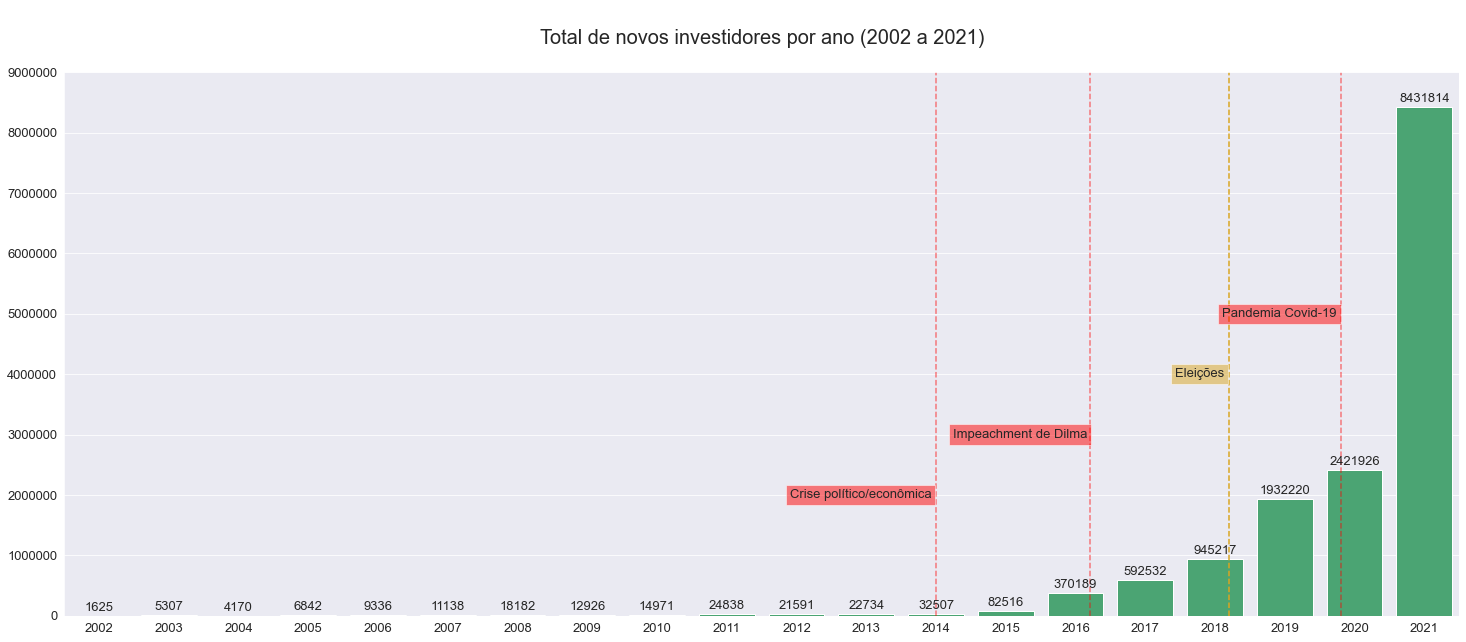

In [198]:
plt.figure(figsize=(25, 10))
plot = sns.barplot(x=df_investidores_ano.index,
                   y=df_investidores_ano['qtde'],
                   orient='v',
                   palette=['mediumseagreen'])
for i in plot.patches:
    plot.annotate(format(i.get_height(), '3.0f'),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  xytext=(0, 5),
                  textcoords='offset points')
plt.axvline(x=12, linestyle='--', color='red', alpha=0.5)
plt.axvline(x=14.2, linestyle='--', color='red', alpha=0.5)
plt.axvline(x=16.2, linestyle='--', color='goldenrod')
plt.axvline(x=17.8, linestyle='--', color='red', alpha=0.5)
plt.text(9.9, 2000000, 'Crise político/econômica', va='center',
         bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(12.24, 3000000, 'Impeachment de Dilma', va='center',
         bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.text(15.42, 4000000, 'Eleições', va='center', bbox=dict(
    facecolor='goldenrod', alpha=0.5), fontsize=13)
plt.text(16.1, 5000000, 'Pandemia Covid-19', va='center',
         bbox=dict(facecolor='red', alpha=0.5), fontsize=13)
plt.ylim(0, 9000000)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.ylabel('')
plt.title('\nTotal de novos investidores por ano (2002 a 2021)\n', fontsize=20)
plt.show(plot)


Desde sua criação em **2002** o número de novos inscritos só ultrapassou a marca de 100.000 em **2015** em um **período de 13 anos** com 170.297 adesões, anteriormente em **2014** iniciou-se uma série de **acontecimentos políticos/econômicos que culmiram em uma crise** no país, já em **2016** a marca de meio milhão foi superada quando houve um salto para 503.129 de inscritos, em **2018, ano de eleições**, o record de um milhão foi quebrado com um total 1.280.551 cadastros, no ano de **2020** ocorreu a pandemia de Covid-19, com medidas restritivas, lockdown e intensificação do home office encerrando o ano com um total 2.943.366 adesões, no ano seguinte, **2021**, o número de inscritos era de **7.305.865**, ou seja, neste ano houve um aumento de **248%** de novos investidores.

## 2. Qual o total de investidores por estado (01/2002 a 07/2022)?

Desde que foi criado o programa em janeiro de 2002, qual o total de investidores que efetuaram a adesão ao tesouro direto até julho de 2022.

In [25]:
df_temp = df_investidores.copy()
df_investidores_uf = df_temp['uf'].value_counts()
df_investidores_uf = pd.DataFrame(df_investidores_uf)
df_investidores_uf.sort_index(inplace=True)
df_investidores_uf.index.name = 'uf'
estados = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo',
           'Goiás', 'Maranhão', 'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
           'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rondônia', 'Roraima',
           'Rio Grande do Sul', 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']
df_investidores_uf.insert(0, 'estado', estados)
df_investidores_uf.rename(columns={'uf': 'qtde'}, inplace=True)
coluna_percentual(df_investidores_uf, 'qtde')

df_investidores_uf


,estado,qtde,%
uf,,,
AC,Acre,45501,0.238090
AL,Alagoas,174578,0.913502
AM,Amazonas,266487,1.394428
AP,Amapá,53407,0.279459
BA,Bahia,895087,4.683658
CE,Ceará,571215,2.988956
DF,Distrito Federal,490326,2.565694
ES,Espírito Santo,379205,1.984239
GO,Goiás,642741,3.363225


In [26]:
# Função para criar dataframes de estados divididos por regiões
# param1: dataframe
# param2: lista de estados

def uf_por_regiao(param1, param2):
    df_temp = param1[param1.index.isin(param2)]
    df_temp['%'] = df_temp['qtde'] / df_temp['qtde'].sum() * 100
    return df_temp


sul = ['PR', 'SC', 'RS']
sudeste = ['ES', 'MG', 'RJ', 'SP']
centro_oeste = ['DF', 'GO', 'MS', 'MT']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
norte = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']

df_investidores_sul = uf_por_regiao(df_investidores_uf, sul)
df_investidores_sudeste = uf_por_regiao(df_investidores_uf, sudeste)
df_investidores_centro_oeste = uf_por_regiao(df_investidores_uf, centro_oeste)
df_investidores_nordeste = uf_por_regiao(df_investidores_uf, nordeste)
df_investidores_norte = uf_por_regiao(df_investidores_uf, norte)

print('\n REGIÃO NORTE')
print(tabulate(df_investidores_norte, headers='keys', tablefmt='fancy_grid'))
print('\n REGIÃO NORDESTE')
print(tabulate(df_investidores_nordeste, headers='keys', tablefmt='fancy_grid'))
print('\n REGIÃO CENTRO-OESTE')
print(tabulate(df_investidores_centro_oeste, headers='keys', tablefmt='fancy_grid'))
print('\n REGIÃO SUDESTE')
print(tabulate(df_investidores_sudeste, headers='keys', tablefmt='fancy_grid'))
print('\n REGIÃO SUL')
print(tabulate(df_investidores_sul, headers='keys', tablefmt='fancy_grid'))



 REGIÃO NORTE
╒══════╤═══════════╤════════╤══════════╕
│ uf   │ estado    │   qtde │        % │
╞══════╪═══════════╪════════╪══════════╡
│ AC   │ Acre      │  45501 │  4.2157  │
├──────┼───────────┼────────┼──────────┤
│ AM   │ Amazonas  │ 266487 │ 24.6902  │
├──────┼───────────┼────────┼──────────┤
│ AP   │ Amapá     │  53407 │  4.9482  │
├──────┼───────────┼────────┼──────────┤
│ PA   │ Pará      │ 440188 │ 40.7838  │
├──────┼───────────┼────────┼──────────┤
│ RO   │ Rondônia  │ 131899 │ 12.2205  │
├──────┼───────────┼────────┼──────────┤
│ RR   │ Roraima   │  42865 │  3.97147 │
├──────┼───────────┼────────┼──────────┤
│ TO   │ Tocantins │  98975 │  9.17011 │
╘══════╧═══════════╧════════╧══════════╛

 REGIÃO NORDESTE
╒══════╤═════════════════════╤════════╤══════════╕
│ uf   │ estado              │   qtde │        % │
╞══════╪═════════════════════╪════════╪══════════╡
│ AL   │ Alagoas             │ 174578 │  5.27347 │
├──────┼─────────────────────┼────────┼──────────┤
│ BA   │ Bahia 

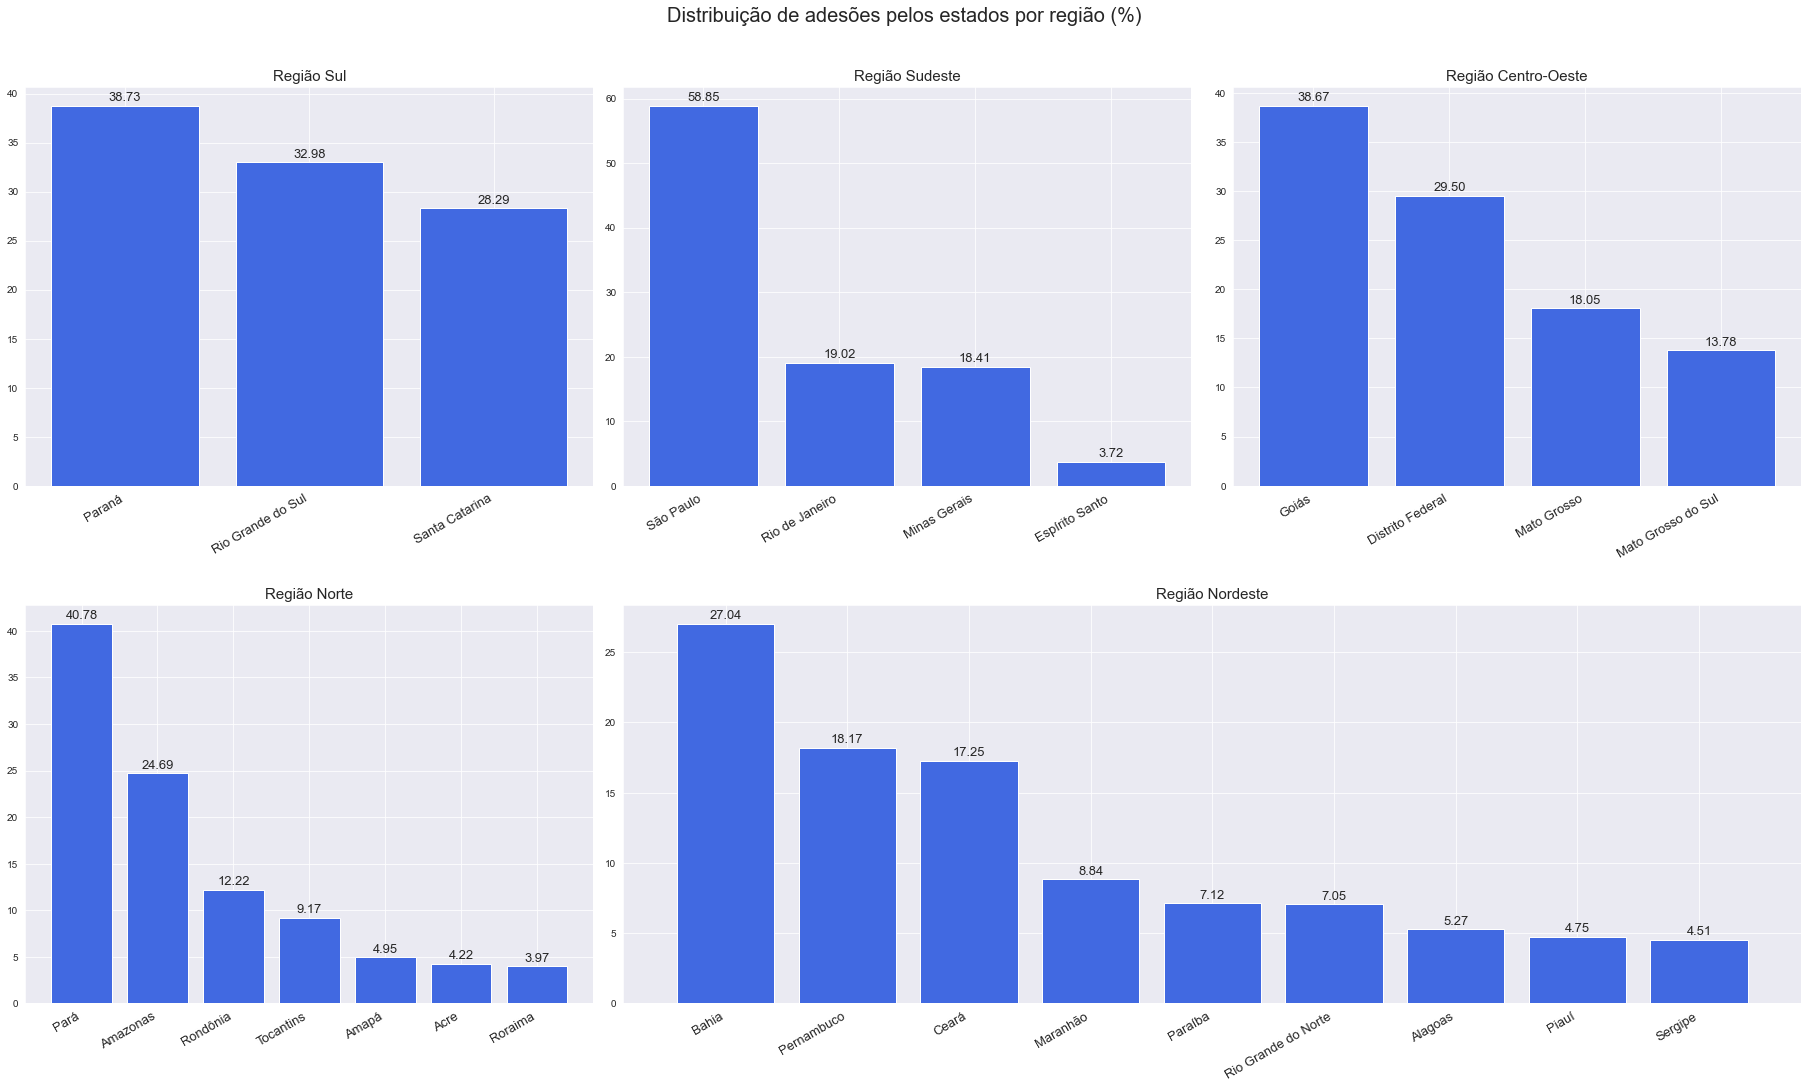

In [27]:
# Função para inserir dados no gráfico de barras
# param1: axis

def inseri_valores_graf(param1):
    for i in param1.patches:
        param1.annotate(format(i.get_height(), '.2f'),
                        (i.get_x() + i.get_width()/2, i.get_height()),
                        ha='center', va='baseline', fontsize=13,
                        xytext=(0, 5), textcoords='offset points')


df_investidores_sul.sort_values(by='%', ascending=False, inplace=True)
df_investidores_sudeste.sort_values(by='%', ascending=False, inplace=True)
df_investidores_centro_oeste.sort_values(by='%', ascending=False, inplace=True)
df_investidores_nordeste.sort_values(by='%', ascending=False, inplace=True)
df_investidores_norte.sort_values(by='%', ascending=False, inplace=True)

fig = plt.figure(figsize=(25, 15), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

ax00 = fig.add_subplot(spec[0, 0])
ax00.bar(df_investidores_sul['estado'],
         df_investidores_sul['%'], color='royalblue')
ax00.set_title('\nRegião Sul', fontsize=15)
inseri_valores_graf(ax00)
plt.setp(ax00.get_xticklabels(), rotation=30, ha='right', fontsize=13)

ax01 = fig.add_subplot(spec[0, 1])
ax01.bar(df_investidores_sudeste['estado'],
         df_investidores_sudeste['%'], color='royalblue')
ax01.set_title('Região Sudeste', fontsize=15)
inseri_valores_graf(ax01)
plt.setp(ax01.get_xticklabels(), rotation=30, ha='right', fontsize=13)

ax02 = fig.add_subplot(spec[0, 2])
ax02.bar(df_investidores_centro_oeste['estado'],
         df_investidores_centro_oeste['%'], color='royalblue')
ax02.set_title('Região Centro-Oeste', fontsize=15)
inseri_valores_graf(ax02)
plt.setp(ax02.get_xticklabels(), rotation=30, ha='right', fontsize=13)

ax10 = fig.add_subplot(spec[1, 0])
ax10.bar(df_investidores_norte['estado'],
         df_investidores_norte['%'], color='royalblue')
ax10.set_title('Região Norte', fontsize=15)
inseri_valores_graf(ax10)
plt.setp(ax10.get_xticklabels(), rotation=30, ha='right', fontsize=13)

ax11 = fig.add_subplot(spec[1, 1:])
ax11.bar(df_investidores_nordeste['estado'],
         df_investidores_nordeste['%'], color='royalblue')
ax11.set_title('\nRegião Nordeste', fontsize=15)
inseri_valores_graf(ax11)
plt.setp(ax11.get_xticklabels(), rotation=30, ha='right', fontsize=13)

fig.suptitle(
    'Distribuição de adesões pelos estados por região (%)\n', fontsize=20)
plt.show()


Considerando o perído de **janeiro de 2002 até julho de 2022**, **São Paulo** é o estado com maior número de adesões com 5.997.831 representando aproximadamente **31,39%** do total de **19.110.853** cadastros, seguido de **Rio de Janeiro** com 1.938.444 e **Minas Gerais** com 1.876.814, respectivamente **10,15%** e **9,9%** aproximados, somandos, os três estados da região sudeste, respondem por mais de **51% do total de inscritos** no programa. Na distribuição de adesões por região o cenário é de que na região sul o estado do Paraná responde por 38,73%, na região sudeste São Paulo responde por 58,85%, na região centro-oeste Goiás possui 38,67% dos cadastros, na região norte o Pará concentra 40,78% e a na região nordeste a Bahia detém 27,04%, São Paulo que apresenta a maior diferença na sua região concentrando quase 60% das adesões.

## 3. Qual o total de investidores em um ranking de 10 cidades (01/2002 a 07/2022)?

Considerando o período de janeiro de 2002 à julho de 2022, quais são as dez cidades onde estão concentradas a maioria dos investidores do tesouro direto.

In [28]:
df_temp = df_investidores.copy()
df_investidores_cidades = df_temp['cidade'].value_counts().nlargest(10)
df_investidores_cidades = pd.DataFrame(df_investidores_cidades)
df_investidores_cidades.rename(columns={'cidade': 'qtde'}, inplace=True)
df_investidores_cidades.index.name = 'cidade'
coluna_percentual(df_investidores_cidades, 'qtde')

df_investidores_cidades


,qtde,%
cidade,,
SAO PAULO,2087900,37.371103
RIO DE JANEIRO,941585,16.853331
BRASILIA,489633,8.763890
BELO HORIZONTE,439577,7.867943
CURITIBA,337603,6.042721
SALVADOR,323497,5.790239
FORTALEZA,290827,5.205482
MANAUS,232041,4.153278
GOIANIA,226398,4.052274


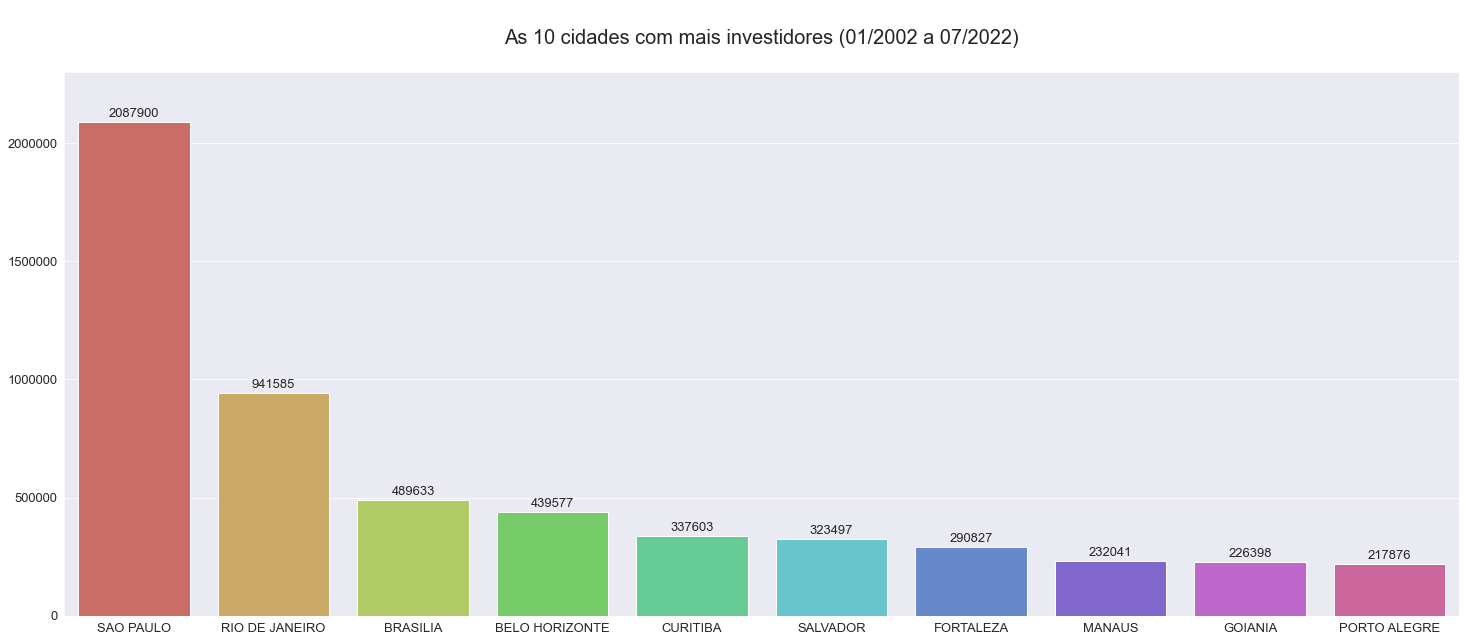

In [190]:
plt.figure(figsize=(25, 10))
plot = sns.barplot(x=df_investidores_cidades.index,
                   y=df_investidores_cidades['qtde'],
                   orient='v',
                   palette='hls')
for i in plot.patches:
    plot.annotate(format(i.get_height(), '3.0f'),
                  (i.get_x()+i.get_width()/2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=13,
                  xytext=(0, 5),
                  textcoords='offset points')
plt.ylim(0, 2300000)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.ylabel('')
plt.title('\nAs 10 cidades com mais investidores (01/2002 a 07/2022)\n', fontsize=20)
plt.show(plot)


A cidade de **São Paulo** é a que mais possui inscritos, com **2.087.900** concentrando mais que o dobro da segunda cidade, **Rio de Janeiro**, com **941.585**, em terceiro está a capital, **Brasília**, com **489.633** e assim seguido pelas cidades de Belo Horizonte, 439.577, Curitiba, 337.603, Salvador, 323.497, Fortaleza, 290.827, Manaus, 232.041, Goiânia, 226.398 e Porto Alegre com 217.876. Todas as regiões do país possuem ao menos um representante no ranking, destaque para região sudeste com três, São Paulo, Rio de Janeiro e Belo Horizonte e a região norte com apenas Manaus a representando.

## 4. Qual a quantidade de investidores que operaram nos últimos 12 meses (07/2021 a 07/2022)?

Qual a quantidade e percentual de investidores com contas ativas e desativadas que fizeram alguma operação nos últimos 12 meses, período que corresponde de julho de 2021 a julho de 2022.

In [30]:
df_temp = df.loc[df['operacao'] == 'S']
df_temp = df_temp.sort_values(by=['codigo'])
df_temp.drop_duplicates(subset=['codigo'], inplace=True)
df_temp = df_temp.groupby(['situacao'])['operacao'].value_counts()
df_situacao_operacao = pd.DataFrame(df_temp)
coluna_percentual(df_situacao_operacao, 'operacao')
df_situacao_operacao.index.names = ['situacao', 'operacao_mes']

print('''
    Os últimos 12 meses correspondem ao período de julho de 2021 a julho de 2022

    A = Investidores com conta ativa no tesouro direto
    D = Investidores com conta desativada no tesouro direto

    S = Operou nos últimos 12 meses (07/2021 a 07/2022)
    N = Não operou nos últimos 12 meses (07/2021 a 07/2022)
    ''')

df_situacao_operacao




    Os últimos 12 meses correspondem ao período de julho de 2021 a julho de 2022

    A = Investidores com conta ativa no tesouro direto
    D = Investidores com conta desativada no tesouro direto

    S = Operou nos últimos 12 meses (07/2021 a 07/2022)
    N = Não operou nos últimos 12 meses (07/2021 a 07/2022)
    


,,operacao,%
situacao,operacao_mes,,
A,S,1704061,99.125874
D,S,15027,0.874126


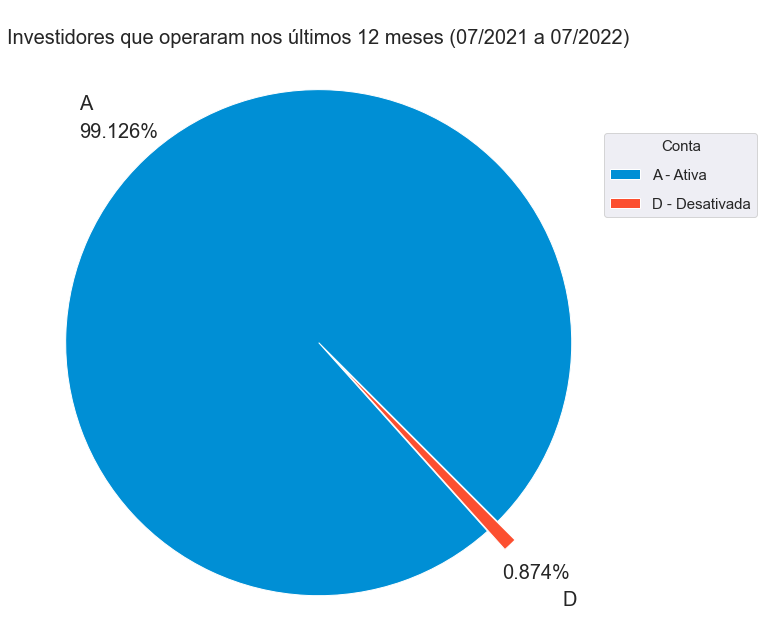

In [31]:
df_graf = df_situacao_operacao.reset_index()

plt.figure(figsize=(10, 10))
plt.pie(df_graf['%'],
        labels=df_graf['situacao'],
        labeldistance=1.3,
        pctdistance=1.15,
        explode=(0, 0.1),
        colors=['#008fd5', '#fc4f30'],
        autopct='%0.3f%%',
        startangle=315,
        textprops=dict(fontsize=20))
plt.title('\nInvestidores que operaram nos últimos 12 meses (07/2021 a 07/2022)\n', fontsize=20)
plt.legend(loc='best',  bbox_to_anchor=(0.7, 0, 0.6, 0.9), labelspacing=1,
           labels=['A - Ativa', 'D - Desativada'], fontsize=15, title='Conta', title_fontsize=15)
plt.axis('equal')
plt.show()


Com **1.704.061** o que representa **99,126%** das contas ativas de investidores que realizaram algum tipo de operação no programa, o restante **15.027**, cerca de **0,874%** de investidores também efetuaram alguma operação no programa, porém, neste mesmo período suas contas foram desativadas. 

## 5. Qual a distribuição de investidores por faixa etária e gênero (01/2002 a 07/2022)?

In [32]:
df_faixa_genero = df_investidores_faixa.copy()

df_faixa_genero = df_faixa_genero.groupby(['idade'])['genero'].value_counts()
df_faixa_genero = pd.DataFrame(df_faixa_genero)
df_faixa_genero.rename(columns={'genero': 'qtde'}, inplace=True)
coluna_percentual(df_faixa_genero, 'qtde')

df_faixa_genero


qtde          %
idade            genero                    
Menos de 18 anos M        252681   1.322304
                 F         67951   0.355594
18 a 24 anos     M       3396491  17.774166
                 F        877548   4.592294
25 a 34 anos     M       4966369  25.989490
                 F       1720120   9.001554
35 a 44 anos     M       3190386  16.695599
                 F       1237612   6.476543
45 a 54 anos     M       1303771   6.822760
                 F        583427   3.053130
55 a 64 anos     M        617687   3.232416
                 F        356404   1.865097
Mais de 65 anos  M        318689   1.667730
                 F        220008   1.151323

In [33]:
df_investidores_f = df_faixa_genero.loc[df_faixa_genero.index.get_level_values(
    'genero') == 'F']
coluna_percentual(df_investidores_f, 'qtde')
df_investidores_f.index = df_investidores_f.index.droplevel(1)

df_investidores_m = df_faixa_genero.loc[df_faixa_genero.index.get_level_values(
    'genero') == 'M']
coluna_percentual(df_investidores_m, 'qtde')
df_investidores_m.index = df_investidores_m.index.droplevel(1)

print('\n GÊNERO FEMININO')
print(tabulate(df_investidores_f, headers='keys',
               tablefmt='fancy_outline', floatfmt=('', '.0f', '.5f')))
print('\n GÊNERO MASCULINO')
print(tabulate(df_investidores_m, headers='keys',
               tablefmt='fancy_outline', floatfmt=('', '.0f', '.5f')))



 GÊNERO FEMININO
╒══════════════════╤═════════╤══════════╕
│ idade            │    qtde │        % │
╞══════════════════╪═════════╪══════════╡
│ Menos de 18 anos │   67951 │  1.34209 │
│ 18 a 24 anos     │  877548 │ 17.33233 │
│ 25 a 34 anos     │ 1720120 │ 33.97385 │
│ 35 a 44 anos     │ 1237612 │ 24.44390 │
│ 45 a 54 anos     │  583427 │ 11.52319 │
│ 55 a 64 anos     │  356404 │  7.03929 │
│ Mais de 65 anos  │  220008 │  4.34535 │
╘══════════════════╧═════════╧══════════╛

 GÊNERO MASCULINO
╒══════════════════╤═════════╤══════════╕
│ idade            │    qtde │        % │
╞══════════════════╪═════════╪══════════╡
│ Menos de 18 anos │  252681 │  1.79894 │
│ 18 a 24 anos     │ 3396491 │ 24.18107 │
│ 25 a 34 anos     │ 4966369 │ 35.35770 │
│ 35 a 44 anos     │ 3190386 │ 22.71372 │
│ 45 a 54 anos     │ 1303771 │  9.28210 │
│ 55 a 64 anos     │  617687 │  4.39758 │
│ Mais de 65 anos  │  318689 │  2.26888 │
╘══════════════════╧═════════╧══════════╛


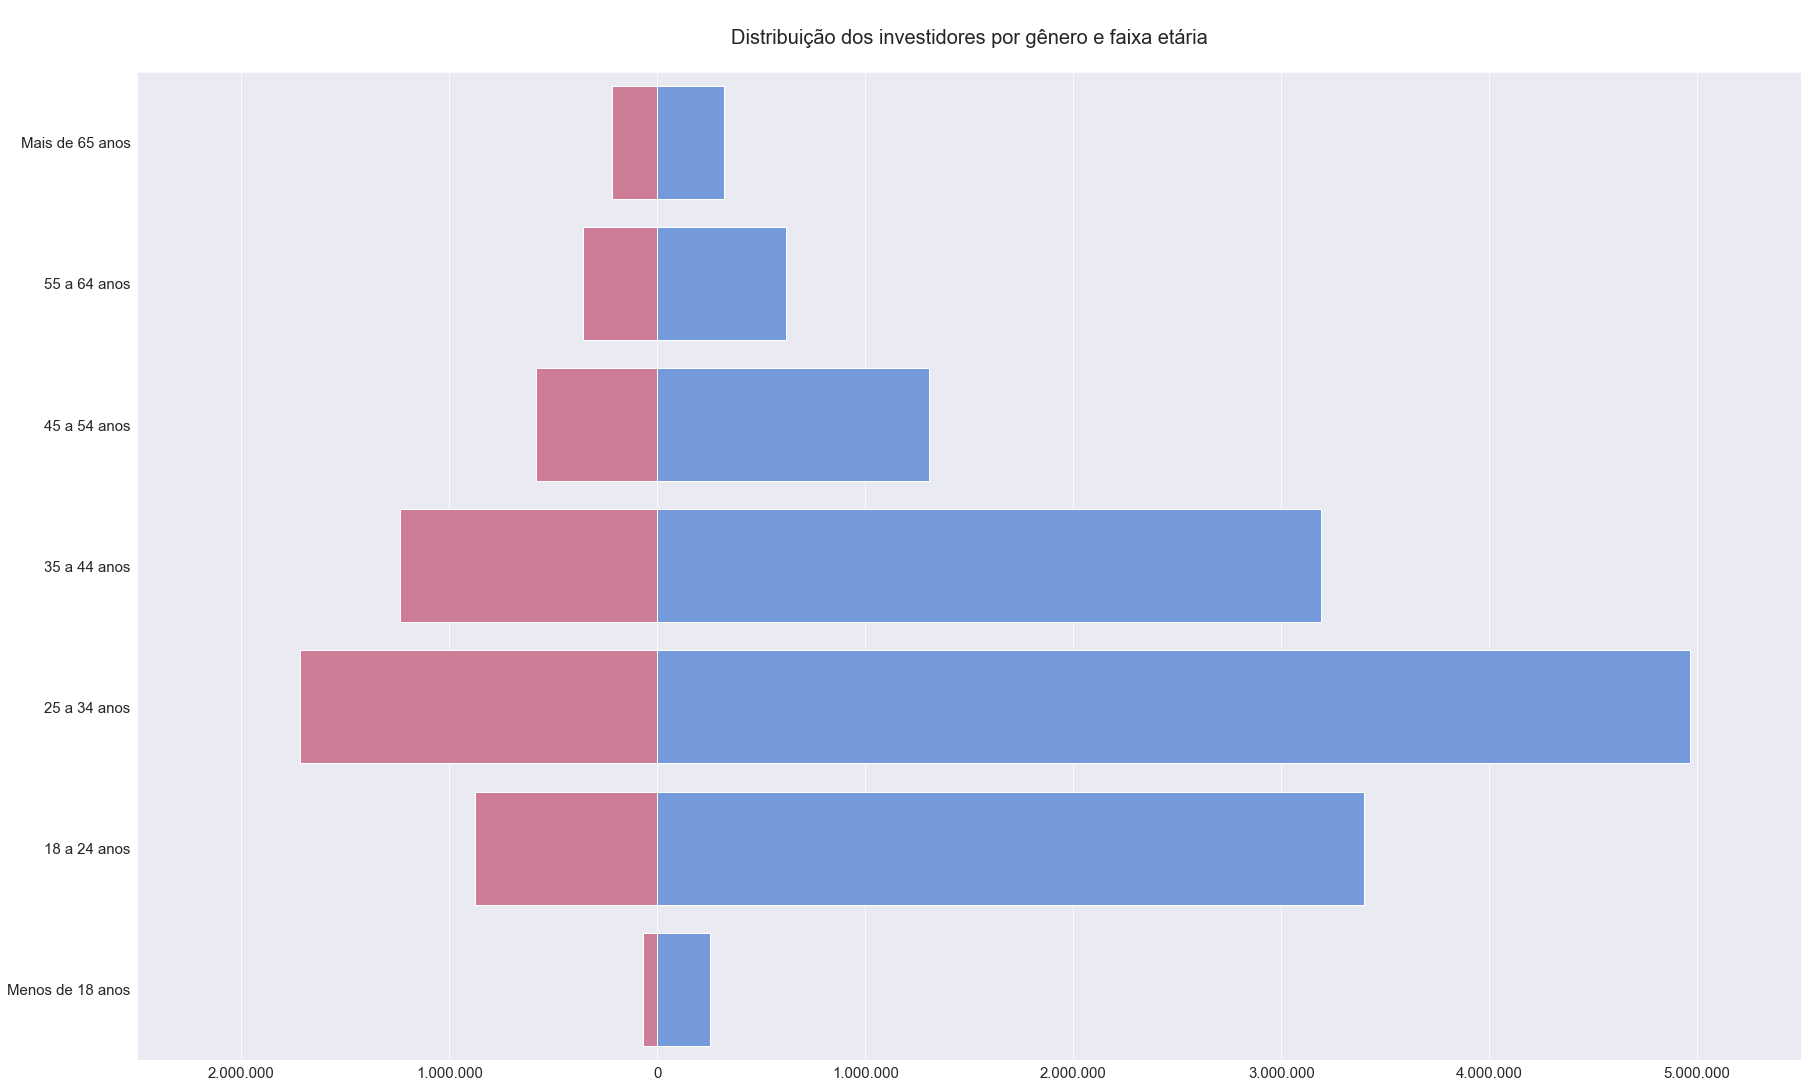

In [188]:
df_investidores_f['qtde'] = df_investidores_f['qtde'].mul(-1)

rotulos.reverse()
rotulos_x = ['3.000.000','2.000.000','1.000.000','0','1.000.000','2.000.000','3.000.000','4.000.000','5.000.000']

plt.figure(figsize=(25, 15), constrained_layout=True)
plot = sns.barplot(x='qtde', y=df_investidores_f.index, data=df_investidores_f, order=rotulos, palette=['palevioletred'])
plot = sns.barplot(x='qtde', y=df_investidores_m.index, data=df_investidores_m, order=rotulos, palette=['cornflowerblue'])                 
plt.xlim(-2500000,5500000)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('')
plt.ylabel('')
plt.title('\nDistribuição dos investidores por gênero e faixa etária\n', fontsize=20)
plot.set_xticklabels(rotulos_x)
plt.show()

## 6. Qual a distribuição de investidores por faixa etária, gênero e estado civil (01/2002 e 07/2022)?

In [123]:
df_faixa_genero_civil = df_investidores_faixa.copy()

df_faixa_genero_civil = df_faixa_genero_civil.groupby(['estado_civil','idade'])['genero'].value_counts()
df_faixa_genero_civil = pd.DataFrame(df_faixa_genero_civil)
df_faixa_genero_civil.rename(columns={'genero':'qtde'},inplace=True)

df_faixa_genero_civil 

qtde
estado_civil                        idade            genero        
Casado(a) com brasileiro(a) nato(a) Menos de 18 anos M          122
                                                     F           41
                                    18 a 24 anos     M         8342
                                                     F         6147
                                    25 a 34 anos     M       150276
...                                                             ...
Viúvo(a)                            45 a 54 anos     F        10186
                                    55 a 64 anos     M        13960
                                                     F        11900
                                    Mais de 65 anos  F        19550
                                                     M         8504

[121 rows x 1 columns]

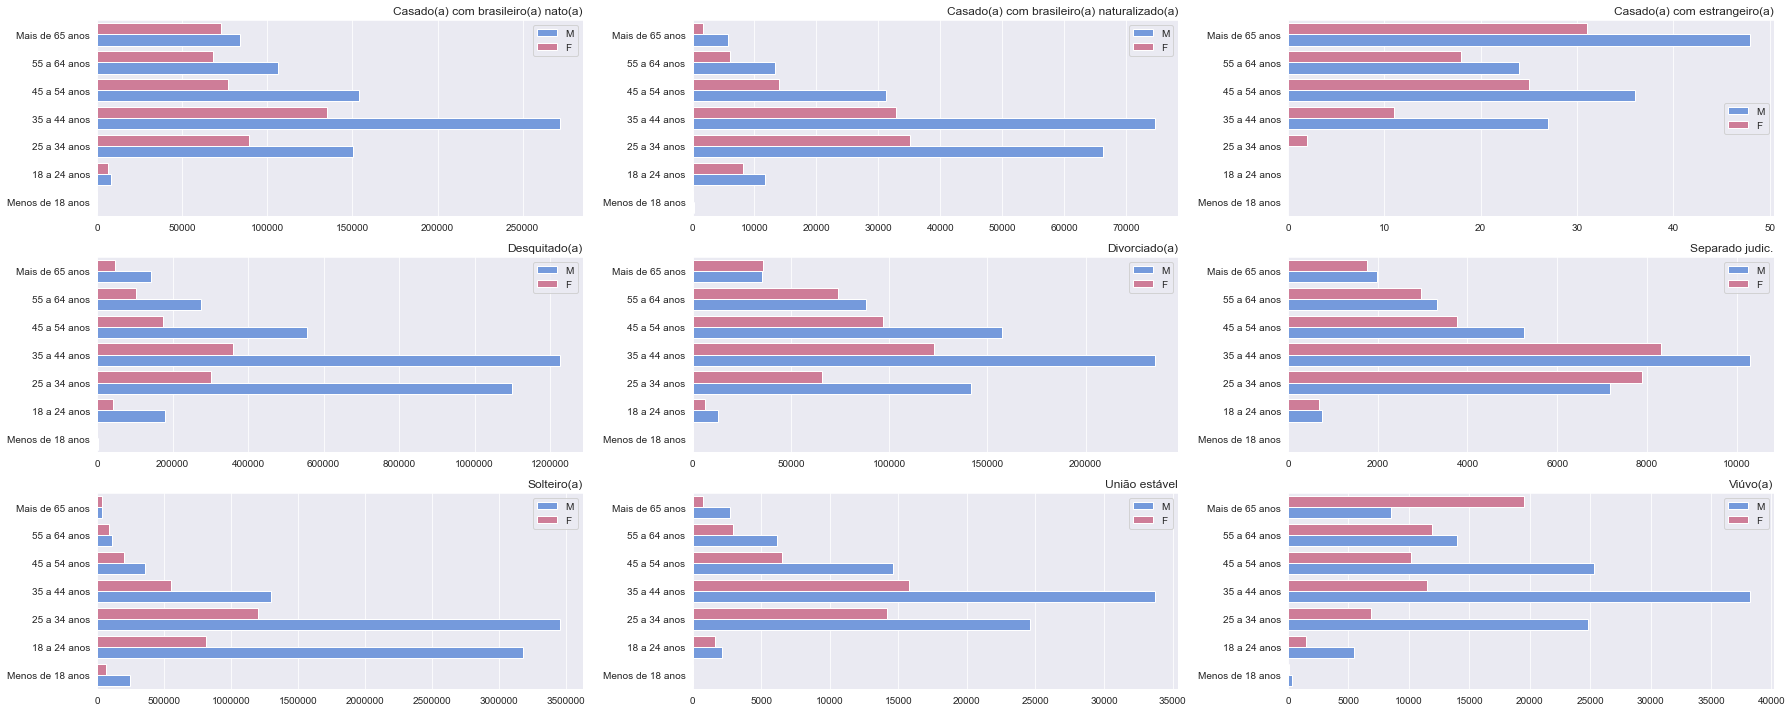

In [196]:
# Função para gerar gráficos de barras de faixa etária, estado civil e gênero
# param1: dataframe
# param2: estado civil
# param3: axis

def graf_faixa_estado_genero(param1, param2, param3):
    sns.barplot(data=param1.loc[param1['estado_civil'] == param2],
                x='qtde', y='idade', hue='genero', hue_order=['M', 'F'],
                ci=False, orient='horizontal', dodge=True,
                ax=param3, palette=['cornflowerblue', 'palevioletred'])
    param3.set_ylabel('')
    param3.set_xlabel('')
    param3.legend()
    param3.invert_yaxis()
    param3.set_title(param2, loc='right')
    param3.ticklabel_format(style='plain', axis='x')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)
      ) = plt.subplots(ncols=3, nrows=3, figsize=(25, 10))

df_temp = df_faixa_genero_civil.reset_index()

graf_faixa_estado_genero(df_temp, 'Casado(a) com brasileiro(a) nato(a)', ax1)
graf_faixa_estado_genero(df_temp, 'Casado(a) com brasileiro(a) naturalizado(a)', ax2)
graf_faixa_estado_genero(df_temp, 'Casado(a) com estrangeiro(a)', ax3)
graf_faixa_estado_genero(df_temp, 'Desquitado(a)', ax4)
graf_faixa_estado_genero(df_temp, 'Divorciado(a)', ax5)
graf_faixa_estado_genero(df_temp, 'Separado judic.', ax6)
graf_faixa_estado_genero(df_temp, 'Solteiro(a)', ax7)
graf_faixa_estado_genero(df_temp, 'União estável', ax8)
graf_faixa_estado_genero(df_temp, 'Viúvo(a)', ax9)

plt.tight_layout()
plt.show()


## 7. Qual a distribuição de investidores em um ranking de 10 perfis profissionais por faixa etária e gênero (01/2002 a 07/2022)?